<a href="https://colab.research.google.com/github/Nick7900/permutation_test/blob/main/a2_between_subject_testing_exchangeable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform permutation - Between-Subject Testing Tutorial (Exchangeable)
In this tutorial, we will learn how to use the ```between_subject_test``` function to perform permutation testing on between-subject data of exchangeable data (described in **Step 2**). The ```between_subject_test``` function is useful when you want to compare data between different subjects or groups. It is commonly used in experimental or observational studies to assess differences in data across different individuals.
Here are a few scenarios where ```between_subject_test``` testing can be useful:

- **Clinical Trials**: In clinical trials, researchers often compare the effectiveness of different treatments or interventions across a group of patients. ```between_subject_test``` can be used to assess whether there are significant differences between treatment groups.

- **Social Sciences**: In social sciences research, you may want to examine differences in behavior, attitudes, or outcomes between different groups of individuals (e.g., age groups, genders, cultural backgrounds). ```between_subject_test``` can help determine if there are statistically significant differences between these groups.

- **Neuroimaging Studies**: In neuroimaging studies, researchers may compare brain activation patterns of different regions/parcellations between different participants. between_subject_test can be used to identify brain regions or networks that show significant differences between groups (e.g., healthy controls vs. patients).


## Permutation testing
Permutation testing is a resampling technique that involves random permutation of the observed data and comparing it to the observed effectto by generating a null distribution under the null hypothesis.

The null hypothesis states that there is no difference or association between variables of interest.

By comparing the observed test statistic with the distribution of test statistics under the null hypothesis, we can determine the p-value and assess the significance of the effect.

Permutation testing (non-parametric) is particularly useful when the underlying data distribution is unknown or violates certain assumptions required by parametric tests. It provides a flexible and robust alternative for hypothesis testing, especially in cases where parametric assumptions cannot be met.


## Step 0: Import Required Libraries
Let's begin by importing the necessary libraries for our analysis. We'll be using ```os```,```numpy```, ```pandas```, for loading the data and for data manipulation.

Furthermore, we will need to import the **GLHMM-package** as ```glhmm```:

If you dont have the **GLHMM-package** installed, then run the following command in your terminal:

```pip install --user git+https://github.com/vidaurre/glhmm```

To use the helper function ```my_functions``` you need to install the library's:
```
pip install mat73
```
```
pip install statsmodels
```
```
pip install tqdm
```

When using **Google Colab** we need to import the following libraries, so we can load the data of interest

```
!pip install requests
!pip install gdown
```

In [ ]:
!pip install mat73
!pip install statsmodels
!pip install tqdm
!pip install requests
!pip install gdown

## Download the GLHMM package

In [ ]:
!git clone https://github.com/vidaurre/glhmm
%cd glhmm

Cloning into 'glhmm'...
remote: Enumerating objects: 863, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 863 (delta 73), reused 65 (delta 40), pack-reused 709
Receiving objects: 100% (863/863), 12.61 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (506/506), done.
/content/glhmm


### Import packages

In [ ]:
import os
import numpy as np
import pandas as pd
from glhmm import glhmm
import requests
import gdown

### Load Helper function

In [ ]:
%cd ..
# Import helper function
# Get the raw github file
url = 'https://raw.githubusercontent.com/Nick7900/permutation_test/main/helper_functions/my_functions.py'
r = requests.get(url)
# Save the function to the directory
with open("my_functions.py","w") as f:
  f.write(r.text)

/content


### Load Permutationt testing functions

In [ ]:
# Import helper function
# Get the raw github file
url = 'https://raw.githubusercontent.com/Nick7900/permutation_test/main/helper_functions/permutation_test.py'
r = requests.get(url)
# Save the function to the directory
with open("permutation_test.py","w") as f:
  f.write(r.text)

## Step 1: Loading Data Files
First, we need to load data files into our Python environment.
We will be working with two data files **data_measurement.npy** and **gamma.npy**.

These files contain measurement data and corresponding gamma values estimated from a trained ```glhmm``` model, respectively.

# Load directly from google drive
Remove the text **file/d/** from the link and replace it with **uc?id=**

Now remove the section after the file ID, including **/view** and replace it with **&export=download** in place of the text you have removed

In [ ]:
# Define the folder and file names
folder_name = ""
# data_behavioral
url = "https://drive.google.com/uc?id=1Dac8F1iQTPA3rqjR6qsQN2L14VqMxsA4&export=download"
gdown.download(url, quiet=False)
# data_measurement_file
url = "https://drive.google.com/uc?id=1dBlUk_ecvkCQILZCSCcreMJ71vOvQ54P&export=download"
gdown.download(url, quiet=False)
# data_gamma_file
url = "https://drive.google.com/uc?id=1UkDPbepluacv-1ozk8RD25Yo25u0TOw_&export=download"
gdown.download(url, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Dac8F1iQTPA3rqjR6qsQN2L14VqMxsA4&export=download
To: /content/data_behavioral.npy
100%|██████████| 1.09k/1.09k [00:00<00:00, 1.26MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dBlUk_ecvkCQILZCSCcreMJ71vOvQ54P&export=download
To: /content/data_measurement.npy
100%|██████████| 7.20M/7.20M [00:00<00:00, 35.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UkDPbepluacv-1ozk8RD25Yo25u0TOw_&export=download
To: /content/gamma.npy
100%|██████████| 432k/432k [00:00<00:00, 56.3MB/s]


'gamma.npy'

In [ ]:
data_behavioral_file = 'data_behavioral.npy'
data_measurement_file = 'data_measurement.npy'
data_gamma_file = 'gamma.npy'

# Load behavioral data
file_path = os.path.join(folder_name, data_behavioral_file)
data_behavioral = np.load(file_path)

# Load measurement data
file_path = os.path.join(folder_name, data_measurement_file)
data_measurement = np.load(file_path)

# Load gamma data
file_path = os.path.join(folder_name, data_gamma_file)
data_gamma = np.load(file_path)


### Step 1.1 : Look at the data

Now we can look at the data structure.

What we can see here is that ```data_measurement =[60, 300, 50]```. \
What the data really contains are 60 subject and each subject has been measured of a period of time(T) for 300 timestamps and 50 parcellations over the brain.

For the corresponding 60 subjects, we got ```data_behavioral =[60,2]```, which are **behavioral** measurement of each subjects *sex* and *age*.

When we look at ```data_gamma =[18000, 4]```. The gamma measurement are concatenated for every timepoint for each subject 18000 (60 by 300). We got 4 columns and each represents the 4 different states at each timepoint per subject.


In [ ]:
print(f"Data dimension of data_measurement: {data_measurement.shape}")
print(f"Data dimension of data_behavioral: {data_behavioral.shape}")
print(f"Data dimension of data_gamma: {data_gamma.shape}")

Data dimension of data_measurement: (60, 300, 50)
Data dimension of data_behavioral: (60, 2)
Data dimension of data_gamma: (18000, 3)


## Step 2: Data Preparation (exchangeability)

Normally, the standard assumption in neuroscience studies is that trials are exchangeable.

The assumption of exchangeability of trials refers to the notion that the sequence or group of the trials has no effect on the underlying statistical features of the data.\
In other words, it presumes that the observations or measurements within each trial are independent and identically distributed and that the order of the trials has no systematic bias or confounding effects.

However, it is important to highlight that the premise of exchangeability may not always be valid in all neuroscience studies. There may be some experimental designs or data collection processes where the order of trials or interdependence among trials induce biases or alter the observed outcomes.\ In such circumstances, it is vital to carefully analyze the specific study design and data characteristics in order to verify the validity of the statistical analyses performed.


To account for exchangeability between subjects using permutation testing, we must have the same number of trials or timepoints for each subject/session.

### Example
In this example, each subject has been measured for 300 timepoints each (THIS DATASET NEED TO BE REPLACED BY SOMETHING ELSE BEFORE PUBLICATION, since it should be TRIALS), which fits with the criteria for running the code.
First, we need to concatenate the data_measurements to generate our ```X_data```.\
Second, the design-matrix (```D_data```) of the behavioral data will be aligned with the corresponding measurements in X_data by repeating the values for the same subject.\
Finally, the index of each subject or session (```idx_data```) is assied to each row of the concatenated data (X_data).

In [ ]:
# 1. Concatenate the data for each subject/session
X_data = np.concatenate([data_measurement[i] for i in range(data_measurement.shape[0])], axis=0)
# 2. Align behaviral data with corresponding X_data
D_data = np.repeat(data_behavioral,data_measurement.shape[1], axis=0)
# Indices for concatenating the data for each subject/session
idx_data = np.repeat(range(0,data_measurement.shape[0]), data_measurement.shape[1])

# Run Between-Subject Testing
Now that we have the data prepared for the analysis we will show how to perform between-subject testing using the ```between_subject_test``` function. We will use an example dataset consisting of the prepared **Measured data** and corresponding **behavioral measurements**, and **Index of each subject**. Like previous stated, the behavioral measurements include information about the subjects' sex and age.
- Note: we could have defined ```data_gamma``` as our ```X_data``` as well

Now we can look at the prepared data for exchangeable permutations

In [ ]:
print('X_data shape:', X_data.shape)
print('D_data shape:', D_data.shape)
print('idx_data shape:', idx_data.shape)

X_data shape: (18000, 50)
D_data shape: (18000, 2)
idx_data shape: (18000,)


The ```X_data``` array has a shape of (18000, 50), indicating 18000 time points and 50 parcellations. The ```D_data``` array has a shape of (18000, 2), indicating 18000 time points and 2 behavioral measurements (sex and age). The indices of each subject are represented in ```idx_data``` and looks like an array similar to ```idx_data =[1,1,1,1...2,2,2,2...N_subject]```.

## Step 3: Permutation testing - between subject testing (Exchangeable)

The primary objective of the ```between_subject_test``` function is to conduct permutation tests on data collected between different subjects. To accomplish this, the function employs several auxiliary functions to facilitate the generation of permutations and perform the necessary statistical computations.

When performing exchangeable permutations, it becomes necessary to incorporate information regarding the indices assigned to each subject (referred to as ```idx_data```). Specifically, the permutation process involves permuting the data within each subject or session, beginning with the first trial or timepoint and proceeding sequentially until all timepoints or trials within the dataset have been permuted. It is important to note that ```exchangeable=True``` to enable this exchangeability property, as it defaults to False otherwise.



In [ ]:
# import between_subject_test
from permutation_test import between_subject_test # This function should just be in the GLHMM package

### Parameters
The ```between_subject_test``` function accepts the following parameters:

* X_data (ndarray): Input data array of shape that can be either a 2D array or a 3D array. For 2D array, it got a shape of (n_ST, n_features). For a 3D array,it got a shape (n_timepoints, n_ST, n_features). Where  n_ST = number of subjects or trials
* D_data (ndarray): The dependent-variable or Design-matrix that can be either a 2D array or a 3D array. For 2D array, it got a           shape of (n_ST, n_features). For a 3D array,it got a shape (n_timepoints, n_ST, n_features). Where  n_ST = number of subjects or trials.
* idx_data (ndarray): It can take index data of shape (n_trials, 2) indicating start and end indices of trials or an 1D array of shape (n_ST,) where the indices are defined for each subject/trial.                                   Required if exchangeable=True. Defaults to None.   
* method (str): Method for performing permutation test for regression coefficients or permutation with correlation
* Nperm (int): Number of permutations to perform (default: 1000).
* confounds (numpy.ndarray or None): The confounds array (default: None).
* exchangeable (bool, optional): Flag indicating whether to perform exchangeable permutation between subjects. (default: False)
* test_statistic_option (bool, optional): If True, the function will return the test statistic for each permutation. (default: False)


### Returns
The ```between_subject_test``` function returns two ndarrays:
* pval (numpy.ndarray): Array of p-values of shape (n_timepoints, n_features).
* corr_pval (numpy.ndarray): Array of correlation p-values of shape (n_timepoints, n_features, n_predictions).

### 3.1: Example of usage - Regression
We will now demonstrate how to use the ```between_subject_test``` function by performing permutation test for regression coefficients


In [ ]:
# Set the parameters for between-subject testing
method = "regression" # Calculates both the correlation coefficient matrix and its associated p-value
Nperm = 1000
test_statistic_option=True
exchangeable =True
# Perform between-subject testing
pval, test_statistic_list  =between_subject_test(X_data, D_data, idx_data, method, exchangeable=exchangeable,Nperm=Nperm, test_statistic_option=test_statistic_option)



performing permutation testing for whole data


100%|██████████| 1000/1000 [00:17<00:00, 55.73it/s]


### 3.1: P-value correction

In [ ]:
from my_functions import *
alpha = 0.05
p_values_corrected,rejected_corrected  =pval_test(pval, alpha =alpha)
# Identify significant results after correction
significant_timestamp_position_corrected, significant_indices_corrected = np.where(p_values_corrected < alpha)

# Print the significant results
print("Significant Time Points (Thresholding + Correction):", significant_indices_corrected)

Significant Time Points (Thresholding + Correction): []


### 3.1: Visualize the p-values using heatmap
 Visualize the results by creating some plotting functions. Here's an example of how to plot the p-values

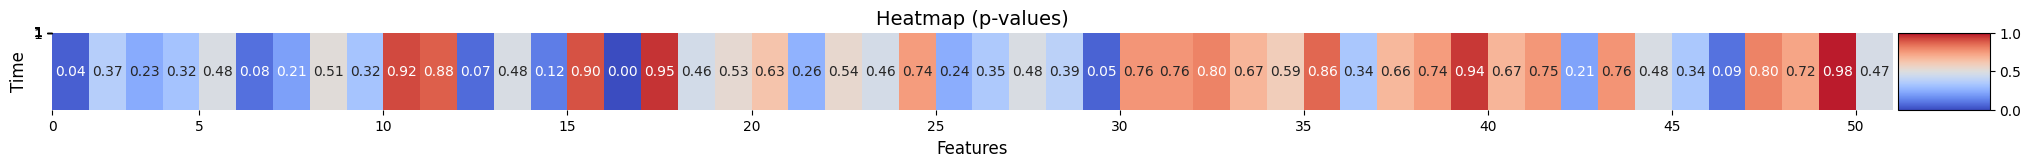

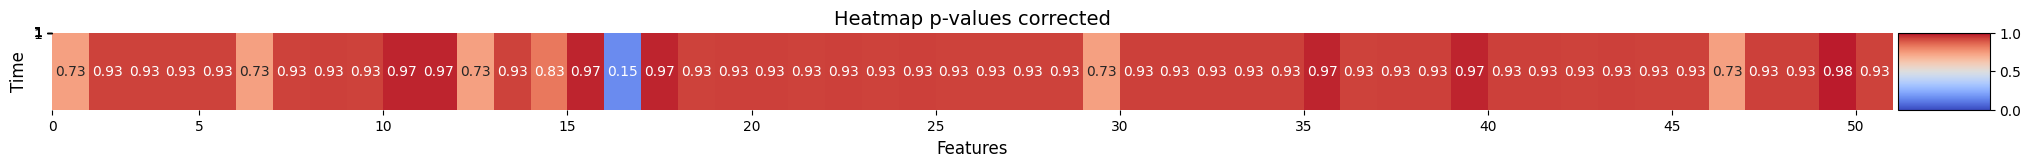

In [ ]:
# Plot p-values
plot_heatmap(pval, method, normalize_vals=True, figsize=(25, 1), steps=11, title_text="", annot=True)
plot_heatmap(p_values_corrected, method, normalize_vals=True, figsize=(25, 1), steps=11, title_text="Heatmap p-values corrected", annot=True)

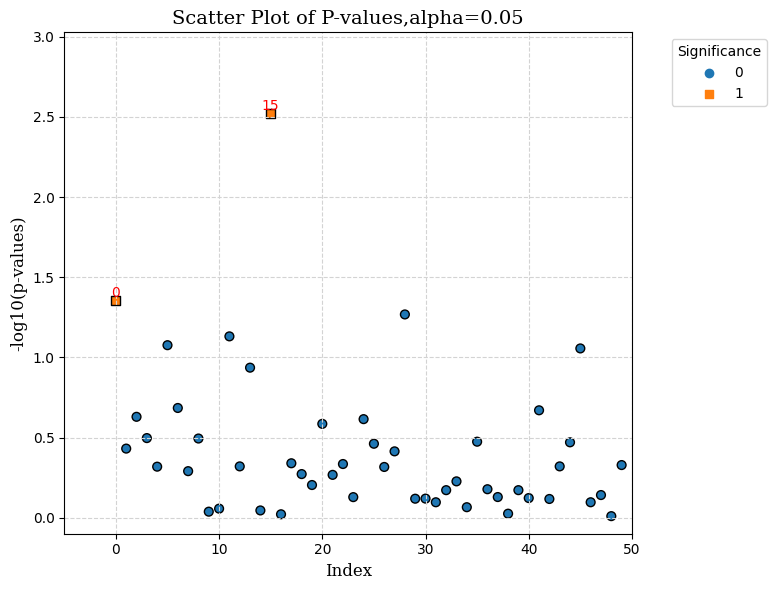

In [ ]:
# Reduce the dimensionality of the first dimension of uncorrected pvalues!
plot_scatter_with_labels(np.squeeze(pval), alpha=0.05)

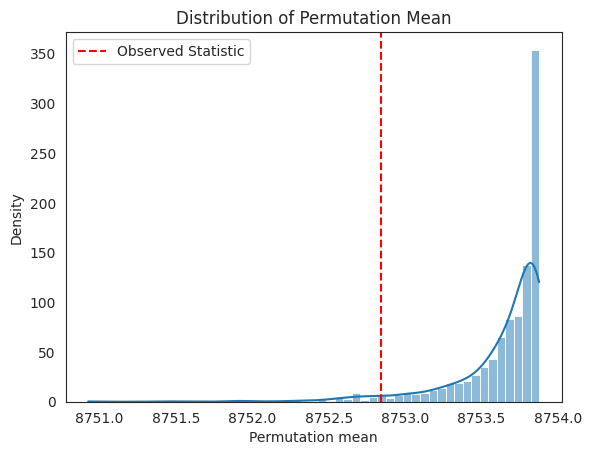

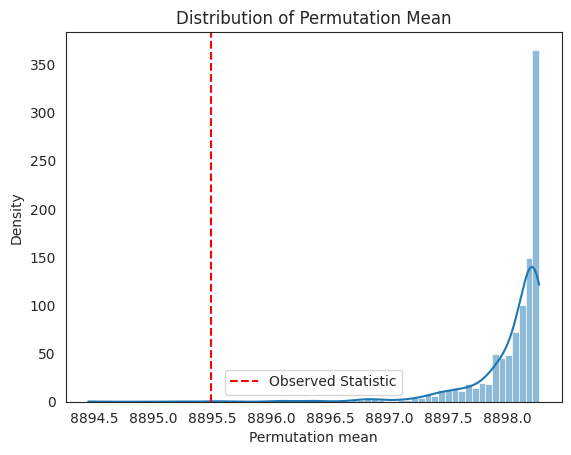

In [ ]:
# Plot test statistics for uncorrected pvals
significant_timestamp_position, significant_indices = np.where(pval < alpha)
for i in significant_indices:
    plot_histograms(np.squeeze(test_statistic_list)[:,i])

### 3.1: Interpret Results
After running the permutation test using **regression**, we can interpret the results.

- The ```p_values``` variable contains the p-values for the regression coefficients of each feature in ```X_data = [n_subject, n_feature]``` for the whole timerseries.

The p-value represents the probability of observing a test statistic as extreme as (or more extreme than) the observed statistic, assuming the null hypothesis is true.




### 3.1: Conclusion
The p-values in permutation with regression show how significant the regression coefficients between every feature and the behavioral measures are. The more strongly the feature is showed to be statistically linked with the behavioral measurements, the lower the p-value must be.
Based on these p-values and the significance level chosen (alpha=0.05), it appears that none of the regression coefficients are statistically significant.


### 3.2: Example of usage - Correlation
We'll show you how to utilize the ```between_subject_test``` function with an exchangeable dataset by running a permutation test on the **correlation coefficients**.


In [ ]:
# Set the parameters for between-subject testing
method = "correlation_com" # Calculates both the correlation coefficient matrix and its associated p-value
Nperm = 1000
test_statistic_option=True
exchangeable =True
# Perform between-subject testing
pval, corr_coef, test_statistic_list, pval_list  =between_subject_test(X_data, D_data, idx_data, method, exchangeable=exchangeable,Nperm=Nperm, test_statistic_option=test_statistic_option)

performing permutation testing for whole data


100%|██████████| 1000/1000 [06:10<00:00,  2.70it/s]


Look at output shapes

In [ ]:
print(f"Data dimension of data_measurement: {pval.shape}")
print(f"Data dimension of data_behavioral: {corr_coef.shape}")

Data dimension of data_measurement: (1, 50, 2)
Data dimension of data_behavioral: (1, 50, 2)


It should be noted that the dimensions of the variables ```pval``` and ```corr_pval``` in the code are ```[1, 50, 2]```. The design of the code assumes that the results correspond to each individual time point in a study.\
However, in this particular example, the data has been consolidated into a single two-dimensional matrix. Consequently, the first dimension or column of the matrix can be disregarded.

### 3.2: P-value correction

In [ ]:
alpha = 0.05
p_values_corrected,rejected_corrected  =pval_test(pval, alpha =alpha)
# Identify significant results after correction
significant_indices_corrected = np.where(p_values_corrected < alpha)

# Print the significant results
print("Significant Time Points (Thresholding + Correction):", significant_indices_corrected)

Significant Time Points (Thresholding + Correction): (array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


### 3.2: Visualize the p-values using heatmap
 Visualize the results by creating some plotting functions. Here's an example of how to plot the correlation coefficients and p-values.

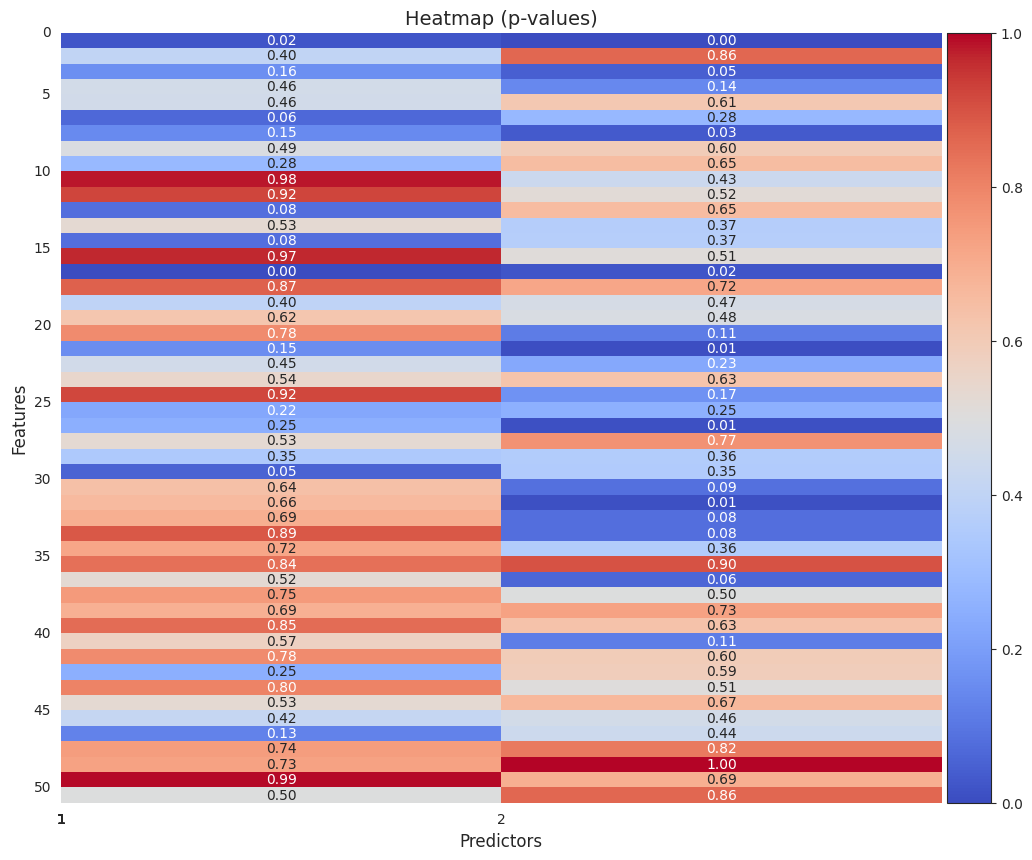

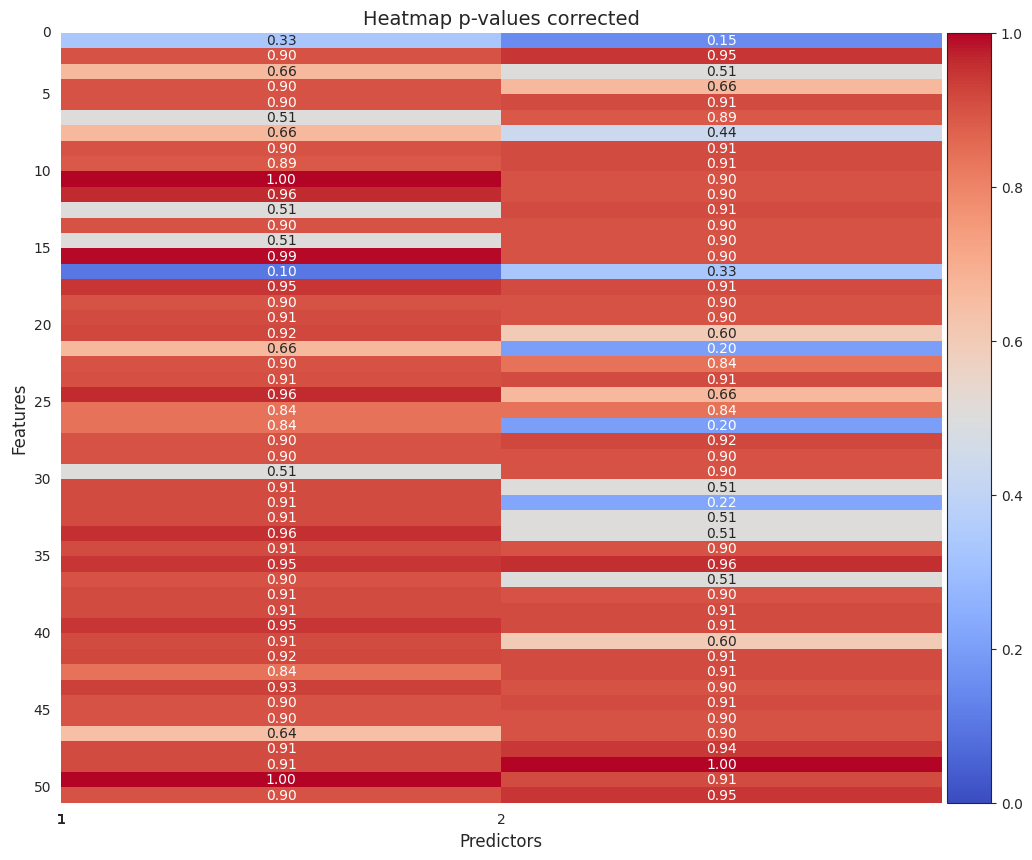

In [ ]:
# Plot p-values
plot_heatmap(pval[0,:], method, normalize_vals=True, figsize=(12, 10), steps=11, annot=True)
plot_heatmap(p_values_corrected[0,:], method, normalize_vals=True, figsize=(12, 10), steps=11, title_text="Heatmap p-values corrected", annot=True)

Heat map for correlation

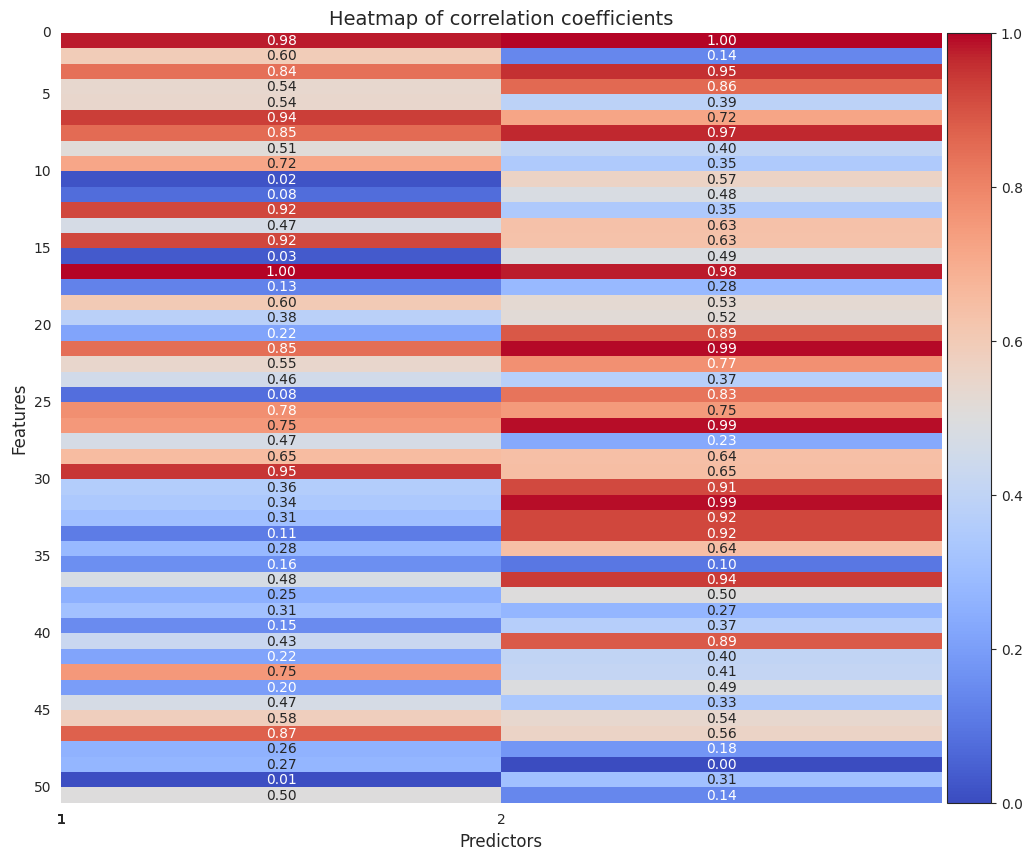

In [ ]:
plot_heatmap(corr_coef[0,:], method, normalize_vals=True, figsize=(12, 10), steps=11, annot=True, title_text="Heatmap of correlation coefficients")

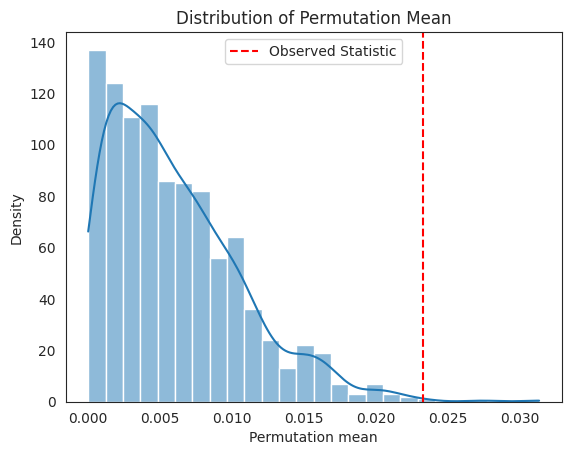

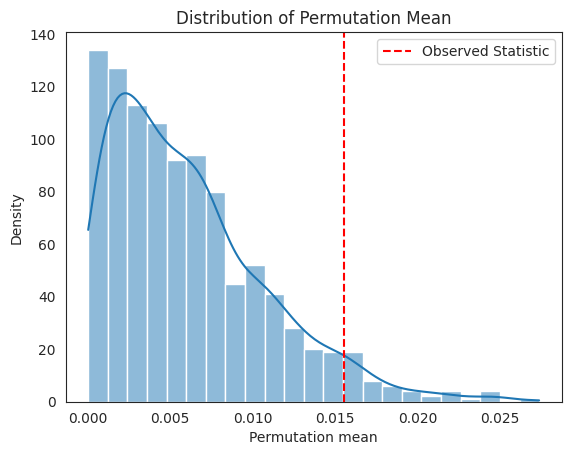

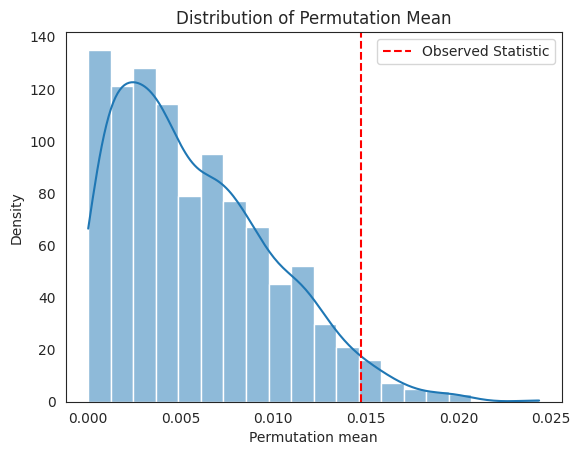

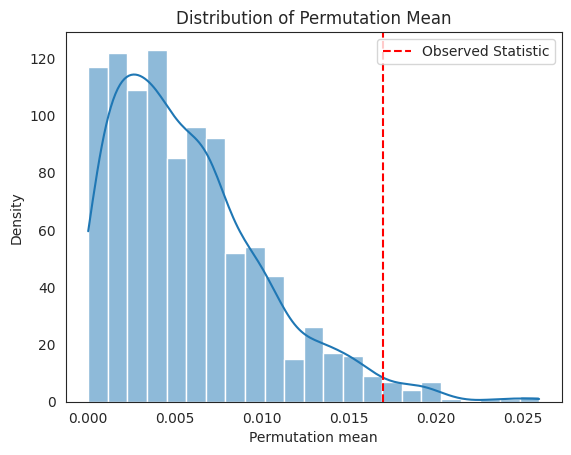

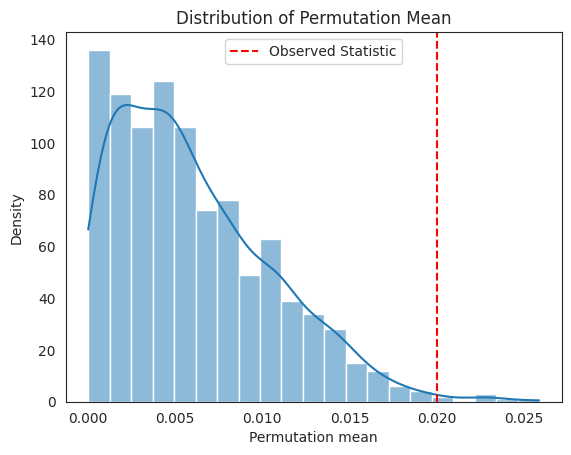

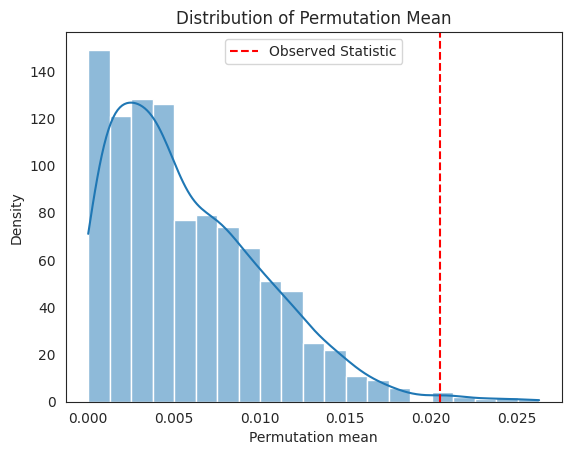

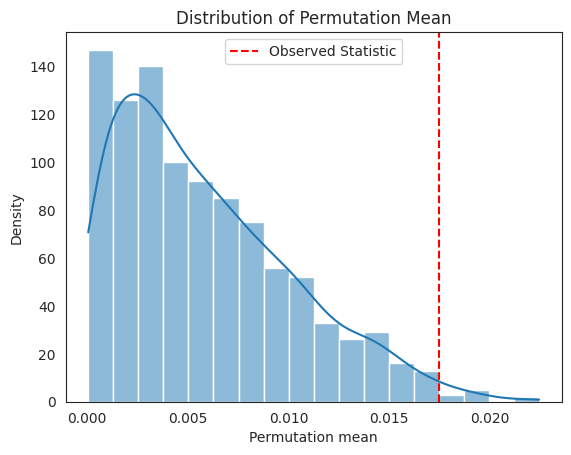

In [ ]:
# Plot test statistics for uncorrected pvals
alpha = 0.05
predictor_idx =1 # index of prerictor age
significant_timestamp_position, significant_indices = np.where(pval[:,:,predictor_idx] < alpha)
for i in significant_indices:
    plot_histograms(np.squeeze(test_statistic_list)[:,i,predictor_idx])

### 3.2: Interpret Results
After running the permutation test using **correlation**, we can interpret the results.

In permutation with correlation, the p-values represent the significance of the correlation coefficients between each measurement feature (50 parcellations) in ```X_data=[n_subject n_feature]``` the behavioral measurements (sex, age) in ```D_data=[n_subject,n_predictors]```. The lower the p-value, the stronger the evidence that the feature is significantly correlated with the behavioral measurements.

- If a p-value is less than the chosen significance level (```alpha=0.05```), you can reject the null hypothesis and conclude that there is a significant correlation between the measured feature and the behavioral measurement.

- If a p-value is greater than the significance level, you fail to reject the null hypothesis, indicating that there is no strong evidence of a significant correlation between the measured feature and the behavioral measurement.




### 3.2: Conclusion
The p-values in permutation with correlation show how significant the correlation coefficients between every feature measures and the behavioral measures are. The more strongly the feature is showed to be statistically linked with the behavioral measurements, the lower the p-value must be.
Based on these p-values and the significance level chosen (alpha=0.05), it appears that none of the correlation coefficients are statistically significant after correction..... (maybe the correction is too conservative?)
